# Machine Learning 5: Real life example

Our dataset is from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically **predict whether or not a patient has diabetes**, based on certain diagnostic measurements included in the dataset.

The datasets consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

The data is relatively clean, we won't discuss pre-processing in detail here, besides the very basics. 

First, let's **import the libraries** we will need. Then, we need to **read the csv file**.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabetes = pd.read_csv('diabetes.csv')

Let's **print the columns and the few top values** from the dataset, to see what we're working with.

In [2]:
diabetes.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Let's take a look at the Outcome variable that we want to predict. **How many people from our dataset have diabetes?**

In [4]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Do we have **missing values** in any columns?

In [5]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Let's look at the **distribution** of each feature to see if we find anything weird.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

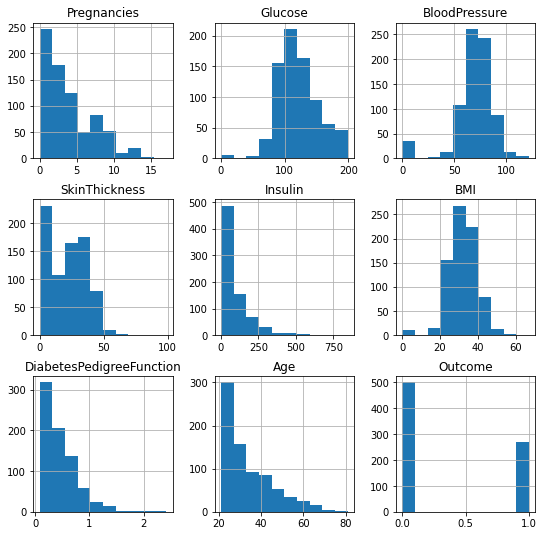

In [6]:
diabetes.hist(figsize=(9, 9))

From the histagram we can see `0` values for *Blood Pressure, BMI, Skin Fold Thikness, Insulin,* and *Blood Glucose*. Those values aren't realistic, and are probably in fact hidden **missing values**. 

For *Blood Pressure, BMI,* and *Glucose*, only a **few values** are missing. We can safely **drop** those rows.

In [7]:
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

It seems like there are a lot of `0` values in the *Insulin* column. Let's check how many.

In [8]:
diabetes[diabetes.Insulin == 0].shape[0]

374

We will **lose a lot of information** if we remove all rows where Insulin value is zero. It seems like a valuable variable to drop it completely. Let's keep it for now and see how it goes.

Now that the data is ready we can **train our model**. Let's try a model called Logistic Regression. 

First, we will create `X` variable with the **features**, and `y` variable with the **outcome**. We will need to split the data into **train and test sets**. There is a function `train_test_split` for this. Please google it to find scikit documentation with the example of usage. We will use **accuracy** to get the estimates. It's a good choice because our outcome variable is rather balanced. 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Now the fun part! 
To get our predictions we need to:
1. **Initialize** the model
2. **Fit** the model (using the input feature vectors `X` and the outcome vector `y` of the **training set**)
3. Use the trained model to **predict** outcome values from the **training set**, and then the **test set** (here, we only provide the input features `X`, the model will give us the predicted `y` values)
4. **Compare** the values the model predicted with the actual outcome values. We will use the accuracy_score function. Please google how to use it. 

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

/home/vmallet/anaconda3/envs/dpp/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred_train = model.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.7771639042357275

In [13]:
y_pred_test = model.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.7513812154696132

## Congratulations on your first model! 
The accuracy on the test set is almost as good as the accuracy on the training set. That means that the model doesn't **overfit** to the training set.
Let's try another model, that is famous for overfitting if not tuned well.

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_pred_train = tree.predict(X_train)
accuracy_score(y_train, y_pred_train)

1.0

In [16]:
y_pred_test = tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.6961325966850829

We can see that the model **fits the training data perfectly** (which is already suspicious), and performs much worse on the test set. One of the way to prevent overfitting is to force the model to be "**simpler**". For the Decision Tree algorithm, one of the indication of its complexity is its "depth". Let's try limiting it to `3`.

In [17]:
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [18]:
y_pred_train = tree.predict(X_train)
accuracy_score(y_train, y_pred_train)

0.7661141804788214

In [19]:
y_pred_test = tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.7458563535911602

Now we can see that the accuracy **decreased** for the training set, but **increased** for the test set. It means our model **generalizes** better, and will be able to predict unseen cases. 